In [82]:
#import library as require
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

In [83]:
#import dataset 
df = pd.read_csv('Housing.csv') 
df.isnull().sum()
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [84]:
#encode
df_encoded = pd.get_dummies(df, columns=['mainroad','guestroom','basement','hotwaterheating','airconditioning', 'prefarea','furnishingstatus'], drop_first=True)
df_encoded = df_encoded.astype(int)
df_encoded

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1,0,1,0,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


In [85]:
# split the dataset into features  and targets  
x=df_encoded.drop('price',axis=1)
y=df_encoded['price']

In [86]:

X=df_encoded[["area","bedrooms","bathrooms","stories","parking","mainroad_yes","airconditioning_yes","prefarea_yes","furnishingstatus_semi-furnished","furnishingstatus_unfurnished"]]

In [87]:
#model training 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [88]:
#predict
y_pred=model.predict(X_test)
y_pred

array([ 5600000.,  7840000.,  4319000.,  4620000.,  3990000.,  2730000.,
        6090000.,  3850000.,  2380000.,  2940000., 12250000.,  3255000.,
        2957500.,  3010000.,  2730000.,  4200000.,  2380000.,  4795000.,
        3640000.,  4690000.,  6160000.,  5523000.,  2957500.,  3633000.,
        4200000.,  5250000.,  3150000.,  5495000.,  5873000.,  3150000.,
        6615000.,  2940000.,  6195000.,  4235000.,  2485000.,  8645000.,
        8750000.,  3115000.,  3360000.,  5495000.,  3773000.,  2870000.,
        7840000.,  4060000.,  6020000.,  4200000.,  7560000.,  4165000.,
        2450000.,  3430000.,  8960000.,  1855000.,  3500000.,  4900000.,
        3500000.,  2940000.,  8295000.,  2660000.,  8120000.,  3255000.,
        3815000.,  3920000.,  4473000.,  4200000.,  2870000.,  4480000.,
        5383000.,  3465000.,  6265000.,  5873000.,  5495000.,  6300000.,
        8400000.,  9100000.,  3290000.,  3640000.,  4480000.,  5033000.,
        3290000.,  5600000.,  8855000.,  8750000., 

In [89]:
#calculate mean absolute error
mae=mean_absolute_error(y_test,y_pred)
mae



1444504.5871559633

In [90]:
#calculate mean squared error
mse=mean_squared_error(y_test,y_pred)
mse

3940054036697.2476

In [91]:
#caluclate R-squared score
r2=r2_score(y_test,y_pred)
r2

0.22049672975959778

In [92]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²) Score: {r2:.2f}")

Mean Squared Error (MSE): 3940054036697.25
R-squared (R²) Score: 0.22


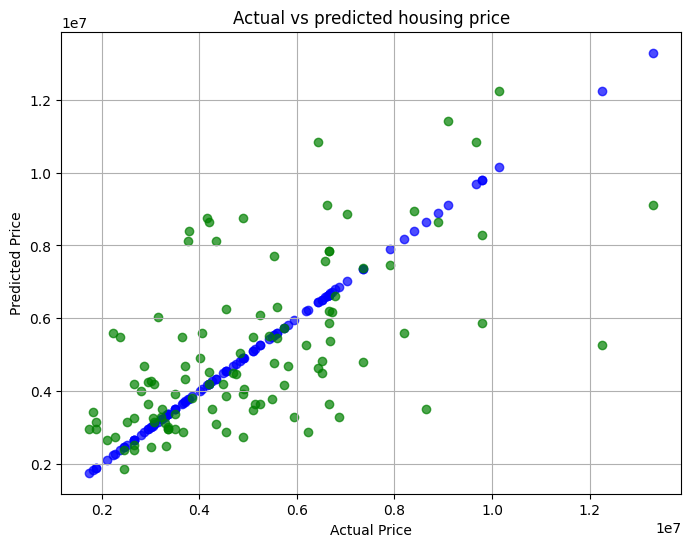

In [93]:
#visualize
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_test,color="blue",alpha=0.7,label="actual")
plt.scatter(y_test,y_pred,color="green",alpha=0.7,label="Predicted")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs predicted housing price")
plt.grid(True)
plt.show()